In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [76]:
X, y = make_blobs(n_samples=10000, centers=4, n_features=2)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=234)

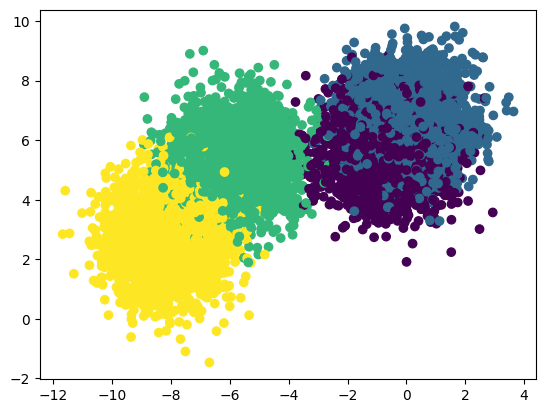

In [78]:
plt.scatter(X[:, 0], X[:,1],c=y)

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Finding the optimal number of clusters using the Elbow Method

In [80]:
wcss = []

for k in range(1,20):
    kmean = KMeans(n_clusters=k, init="k-means++")
    kmean.fit(X_train_scaled)
    wcss.append(kmean.inertia_)

In [81]:
wcss

[13999.999999999995,
 5131.802425468079,
 2995.5557239667605,
 2071.1935743738213,
 1702.9960055243923,
 1443.0735408708745,
 1219.4777504809883,
 1112.9148562276814,
 1020.221740525039,
 935.0541481525319,
 878.4722659240032,
 785.1859999679667,
 744.047392693353,
 693.5260546629868,
 675.9386390677038,
 623.739760957112,
 584.768823214207,
 550.2838872753863,
 529.0381540963875]

Text(0.5, 1.0, 'Elbow curve')

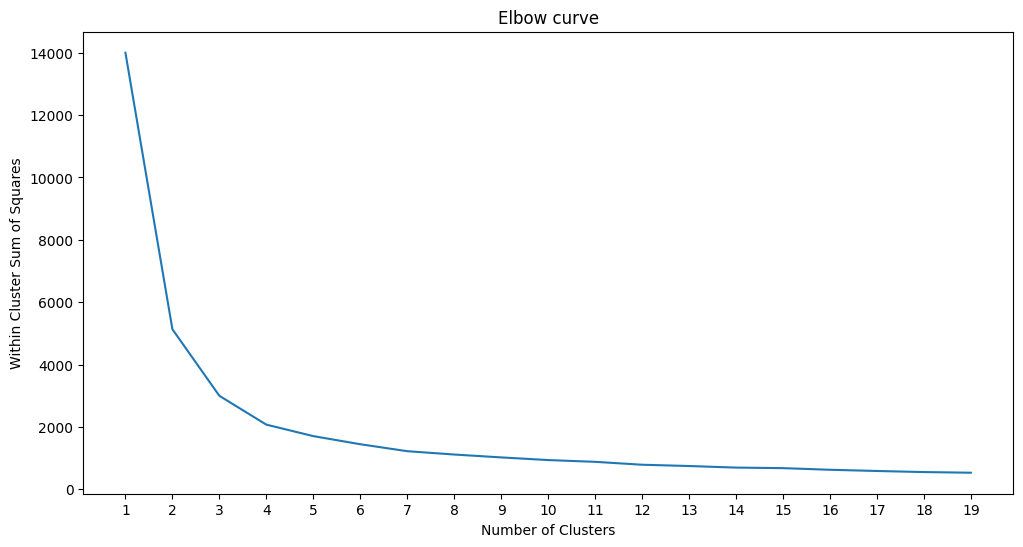

In [82]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(1,20), wcss)
plt.xticks(np.arange(1,20))
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow curve")

In [83]:
silhouette_scores = []

for k in range(2,20):
    kmean = KMeans(n_clusters=k, init="k-means++")
    kmean.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmean.labels_)
    silhouette_scores.append(score)

In [84]:
silhouette_scores

[0.5384266171637834,
 0.5167862541996501,
 0.46616469230073954,
 0.4320852750438915,
 0.38320142144963715,
 0.3659809981012465,
 0.35088741310234906,
 0.3396132214369663,
 0.3338060821905983,
 0.3319660151070127,
 0.3336524364272479,
 0.3283674871961531,
 0.3283513106216764,
 0.322393807615158,
 0.31937490955940706,
 0.3157566870286547,
 0.3148794145259746,
 0.32109290225969267]

Text(0.5, 1.0, 'Elbow curve')

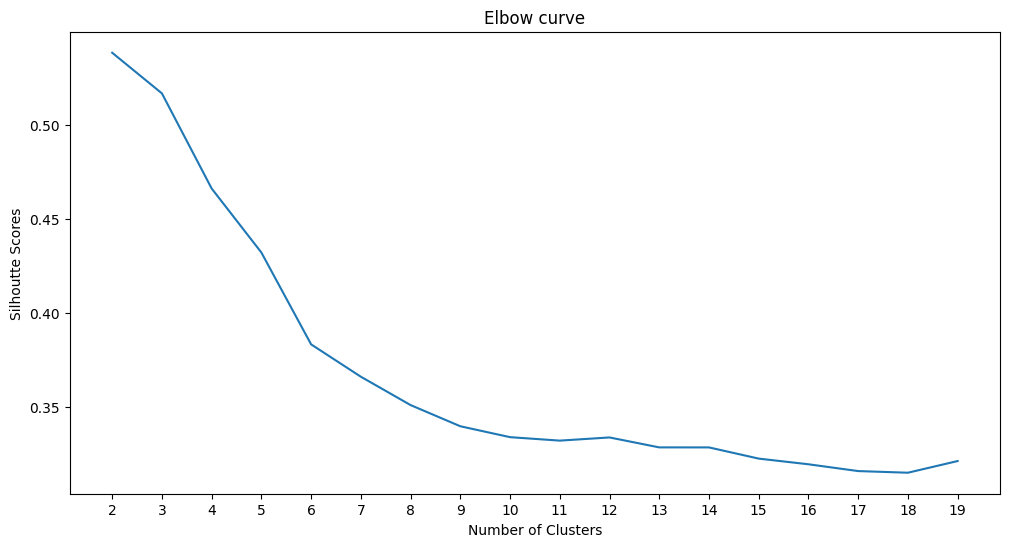

In [85]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(2,20), silhouette_scores)
plt.xticks(np.arange(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.title("Elbow curve")

In [86]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

In [87]:
db.fit(X_train_scaled)

DBSCAN()

In [ ]:
silhouette_scores2 = []

for k in range(2,20):
    db = DBSCAN()
    db.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, db.labels_)
    silhouette_scores2.append(score)

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.plot(np.arange(2,20), silhouette_scores2)
plt.xticks(np.arange(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.title("Elbow curve")